In [1]:
import numpy as np
#from sklearn import NeuralNetworkBase

In [2]:
import pandas as pd
#from deployml.keras import NeuralNetworkBase
#from tensorflow import keras



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

from imblearn.over_sampling import SMOTE

D:\phirsenaya_anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
D:\phirsenaya_anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
from collections import Counter
from keras import Sequential
from keras.layers import Dense



D:\phirsenaya_anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\phirsenaya_anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\phirsenaya_anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\phirsenaya_anaconda\lib\site-packages\tensorflow\python\framework\dtypes.p

In [6]:
bankloan = pd.read_csv("D:\\dataset\\bankloan.csv")
bankloan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
bankloan.shape

(614, 13)

In [8]:
bankloan = bankloan.dropna()

In [9]:
bankloan.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
bankloan=bankloan.drop(['Loan_ID'],axis=1)
bankloan['LoanAmount'] = (bankloan['LoanAmount']*1000).astype(int)
Counter(bankloan['Loan_Status'])



Counter({'N': 148, 'Y': 332})

In [39]:
#fig,axes = plt.subplots(1,3,figsize=(17,5))
#for idx,cat_col in enumerate(numerical_columns):
 #   sb.boxplot(y=cat_col,data=bankloan,x='Loan_Status',ax=axes[idx])

#print(bankloan[numerical_columns].describe())
#plt.subplots_adjust(hspace=1)

In [20]:
# one hot encoded
pre_y = bankloan['Loan_Status']
pre_X=bankloan.drop('Loan_Status',axis=1)
dummy_X = pd.get_dummies(pre_X)
dummy_y = pre_y.map(dict(Y=1,N=0))# creating a dictionary and not creating dummies so that there is only one column of eachsm
pre_y.shape
all_dm_col=dummy_X.columns
#dummy_X.to_excel('var.xlsx')
dummy_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
6,0.0,2333,1516.0,95000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
7,3.0,3036,2504.0,158000,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0
8,2.0,4006,1526.0,168000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
9,1.0,12841,10968.0,349000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
10,2.0,3200,700.0,70000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


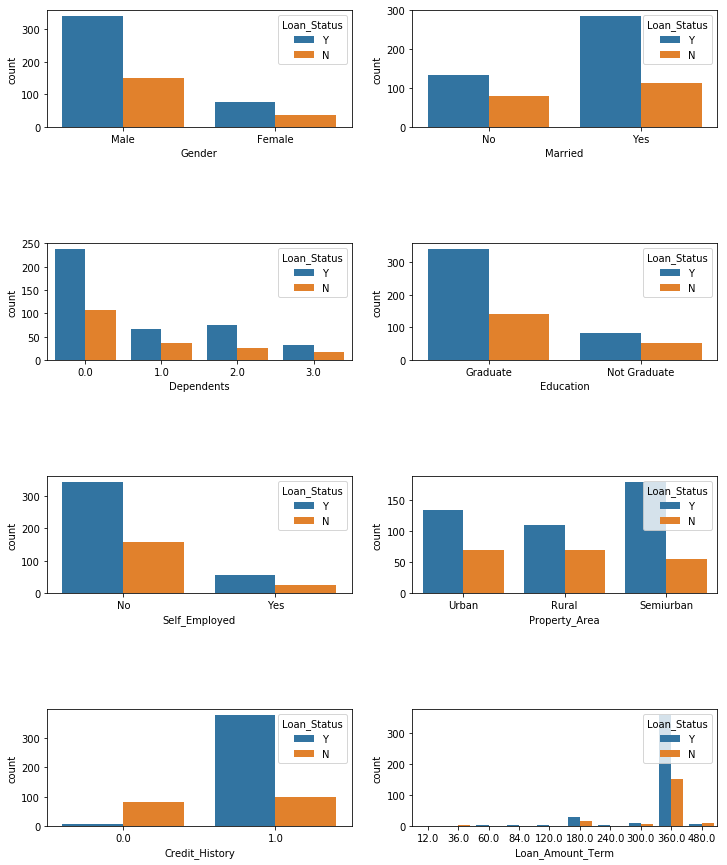

In [23]:
-
#bankloan_processed=pd.get_dummies(pre_X,prefix_sep='_',columns=cat_columns)

#filename = 'allcoll.pkl'
#joblib.dump(mlp,filename)

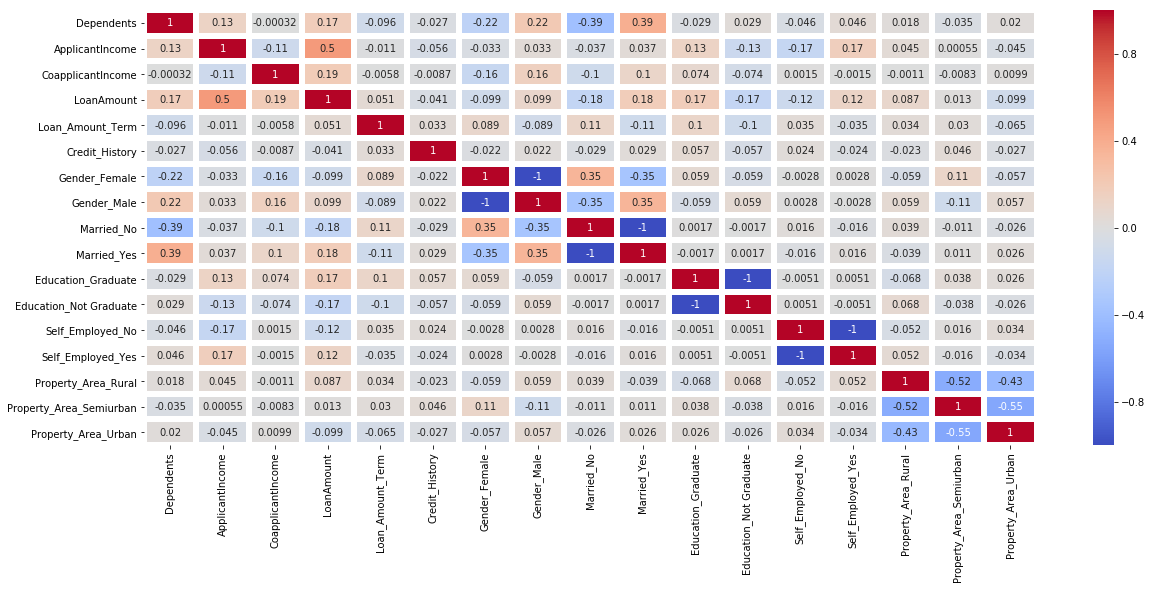

In [36]:
plt.figure(figsize=(20,8))
ax = sb.heatmap(bankloan_processed.corr(),cmap = "coolwarm",annot=True,linewidth=5)

In [21]:
from sklearn.preprocessing import MinMaxScaler
smote=SMOTE(ratio='minority')
X1,y = smote.fit_sample(dummy_X,dummy_y)
sc =MinMaxScaler()
x = sc.fit_transform(X1)

D:\phirsenaya_anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
from sklearn.model_selection import train_test_split

In [22]:
X = dummy_X
y = dummy_y

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [24]:
X_test.to_csv('test.csv',index =False)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 1.23184278, -0.3513672 ,  0.06656546, ..., -0.6336086 ,
        -0.80064077,  1.44802424],
       [-0.75150157,  0.22532385, -0.59002235, ..., -0.6336086 ,
         1.2489996 , -0.69059617],
       [ 1.23184278, -0.31242823,  1.003105  , ...,  1.57826141,
        -0.80064077, -0.69059617],
       ...,
       [ 2.22351495,  0.04360867, -0.0762965 , ...,  1.57826141,
        -0.80064077, -0.69059617],
       [-0.75150157, -0.31407122,  0.01136879, ..., -0.6336086 ,
         1.2489996 , -0.69059617],
       [ 1.23184278, -0.29484819, -0.59002235, ..., -0.6336086 ,
         1.2489996 , -0.69059617]])

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (7,3),max_iter=10000,alpha=0.1,random_state=100)

In [32]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [33]:
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.8151041666666666, 0.8333333333333334)

In [34]:
predictions = mlp.predict(X_test)
predictions = (predictions>0.5)

In [35]:
predictions

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cn = confusion_matrix(y_test,predictions)
cn

array([[12, 16],
       [ 0, 68]], dtype=int64)

[Text(0,0.5,'No'), Text(0,1.5,'Yes')]

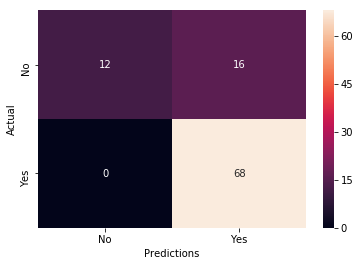

In [38]:
#confusion matrix help in prediction
ax = plt.subplot()
sb.heatmap(cn,annot= True,ax=ax)
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

In [ ]:
import pickle
from sklearn.externals import joblib
filename = 'alladin_model.pkl'
joblib.dump(mlp,filename)